In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('scholarship.csv')

In [4]:
df = data.copy()

In [5]:
df.isnull().sum()

semester_percentage       0
scholarship_exam_marks    0
got_scholarship           0
dtype: int64

In [11]:
df.head()
df.shape

(1000, 3)

## Creating graph to check for outliers.

C:\Users\deepi\AppData\Local\Temp\ipykernel_7120\1480049044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage']) #displot is deprecated
C:\Users\deepi\AppData\Local\Temp\ipykernel_7120\1480049044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_m

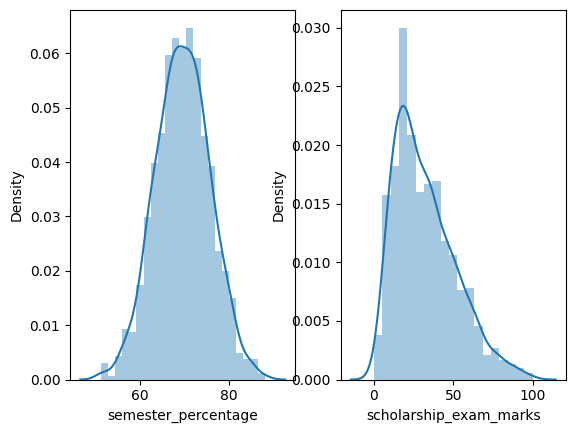

In [61]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage']) #displot is deprecated
# sns.displot(df['semester_percentage'])
# sns.kdeplot(df['semester_percentage'])

plt.subplot(1,2,2)
sns.distplot(df['scholarship_exam_marks'])
# sns.displot(df['scholarship_exam_marks'])
# sns.kdeplot(df['scholarship_exam_marks'])

plt.show()

## Calculating mean and standard deviation to further calculate highest and lowest values for outliers.

In [15]:
mean = df['semester_percentage'].mean()
std = df['semester_percentage'].std()

In [16]:
print(f'Mean = {mean}, Standard Deviation = {std}')

Mean = 69.6124, Standard Deviation = 6.158978751323897


In [17]:
highest_allowed = mean + 3 * std
lowest_allowed = mean - 3 * std
print(f'Highest Allowed = {highest_allowed}, Lowest Allowed = {lowest_allowed}')

Highest Allowed = 88.08933625397168, Lowest Allowed = 51.13546374602831


## Finding out the outlier values...

In [30]:
#will only print value that is either smaller than the lowest outlier or greater than the highest outlier
df[(df['semester_percentage'] < lowest_allowed) | (df['semester_percentage'] > highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## Trimming the outliers that we found.

In [36]:
#will skip the values that are lower than the lowest allowed and higher than the highest_allowed..
df[(df['semester_percentage'] > lowest_allowed) & (df['semester_percentage'] < highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## Creating a new column for z-scores for each semester_percentage row

In [37]:
df['z_score'] = (df['semester_percentage'] - df['semester_percentage'].mean())/df['semester_percentage'].std()

In [38]:
df.head() #now in this the new z_score column is visible. 
#now the z-score that is less than -3 or more than 3 are outliers

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


## Printing outliers based on z-score

In [40]:
df[(df['z_score'] < -3) | (df['z_score'] > 3)] #as you can see the outliers shown by the z-score are the same as shown in earlier method.

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [41]:
#trimming the z-scores that are less than -3 and more than 3
df[(df['z_score'] > -3) & (df['z_score'] < 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## Capping instead of Trimming.

In [46]:
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std
print(f'Upper limit:{upper_limit} \nLower limit:{lower_limit}')

Upper limit:88.08933625397168 
Lower limit:51.13546374602831


In [50]:
df['semester_percentage'] = np.where(df['semester_percentage'] < lower_limit, lower_limit, 
                                     np.where(df['semester_percentage']> upper_limit, upper_limit, df['semester_percentage']))

In [54]:
df[(df['semester_percentage'] > upper_limit) | (df['semester_percentage'] < lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
